<a href="https://www.kaggle.com/code/jiprud/tps-may22-xgb-baseline?scriptVersionId=95847365" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10) # make plots a bit bigger

# Load Data

In [2]:
train_df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv',index_col='id')
test_df = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv',index_col='id')

# Preprocess

In [3]:
import string
characters = list(string.ascii_uppercase)
def engineer_features(df):
    # decode f_27 feature
    # add one feature per character. Number of the feature says how many times is the letter contained in f_27
    # df['f_27']
    for ch in characters:
        df[ch] = df['f_27'].str.count(ch)
        
    # https://www.kaggle.com/code/slythe/relative-features-w-lightgbm
    # Get Unique letters
    df["unique_text_str"] = df["f_27"].apply(lambda x :  ''.join([str(n) for n in list(set(x))]) )
    df["unique_text_str"] = df["unique_text_str"].astype("category")
    df["unique_text_len"] = df.f_27.apply(lambda s: len(set(s)))
    
    df.drop('f_27',axis=1, inplace=True)
    
    # https://www.kaggle.com/competitions/tabular-playground-series-may-2022/discussion/323892
    df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
    df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    

In [4]:
X_train = train_df.drop(['target'], axis = 1)
y_train = train_df['target']
X_test = test_df

engineer_features(X_train)
engineer_features(X_test)

submission = pd.DataFrame(index = X_test.index)  # prepare df for submission

display(X_train,y_train,X_test)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,V,W,X,Y,Z,unique_text_str,unique_text_len,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,BAD,3,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,CEDBA,5,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,0,0,0,0,CEDBKA,6,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,BACD,4,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,CFEDBH,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,0,0,0,0,0,CEDBA,5,0,0,0
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,0,0,0,0,0,QEDBG,5,0,0,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,0,0,0,0,0,EDBHA,5,0,0,0


id
0         0
1         1
2         1
3         1
4         1
         ..
899995    1
899996    0
899997    0
899998    0
899999    1
Name: target, Length: 900000, dtype: int64

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,V,W,X,Y,Z,unique_text_str,unique_text_len,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,0,0,0,0,0,CDBAL,5,0,0,1
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,0,0,0,0,0,CFEBAG,6,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,0,0,0,0,0,CEBKA,5,-1,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,0,0,0,0,0,CQEBA,5,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0,0,0,0,0,FEDBA,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,...,0,0,0,0,0,CMEDBH,6,0,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,...,0,0,0,0,0,CFQDBA,6,0,0,0
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,...,0,0,0,0,0,JCQBAG,6,0,0,0


# Model

## Train and Predict

In [5]:
%%time
from xgboost import XGBClassifier
model_xgb = XGBClassifier(tree_method="gpu_hist",enable_categorical = True)

model_xgb.fit(X_train, y_train)

CPU times: user 11.8 s, sys: 1.16 s, total: 12.9 s
Wall time: 14.1 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [6]:
y_xgb = model_xgb.predict_proba(X_test)
y_xgb

submission['xgb'] = y_xgb[:,1] # Metric is AUC -> we probabilities of 1 will yield better results

## Feature Importance

In [7]:
model_xgb.feature_importances_

array([8.4218889e-02, 3.4395925e-04, 2.0594463e-02, 4.1540229e-04,
       1.1145790e-03, 3.1969761e-03, 2.1038763e-03, 3.2457404e-02,
       6.3373060e-03, 6.7415354e-03, 3.2292011e-03, 1.5114065e-02,
       4.2330700e-01, 9.2924107e-03, 9.8176440e-04, 9.2418893e-04,
       8.1918873e-03, 1.0630318e-02, 2.9142244e-02, 1.3734209e-03,
       3.0531827e-03, 2.8269576e-02, 2.3790449e-03, 7.7885464e-03,
       2.1002376e-03, 4.3407949e-03, 2.3435470e-02, 3.1699315e-02,
       1.8380143e-03, 1.1703242e-03, 1.4776905e-02, 2.3028077e-04,
       4.5259329e-03, 1.5330327e-02, 1.5996914e-02, 4.2834850e-03,
       2.1068567e-02, 1.5712578e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.7322869e-03, 9.2811958e-04,
       9.8720205e-04, 0.0000000e+00, 0.0000000e+00, 7.1172055e-04,
       9.9951820e-04, 5.3380005e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       3.3662595e-02, 7.4873447e-02, 2.0951182e-02, 2.9423384e

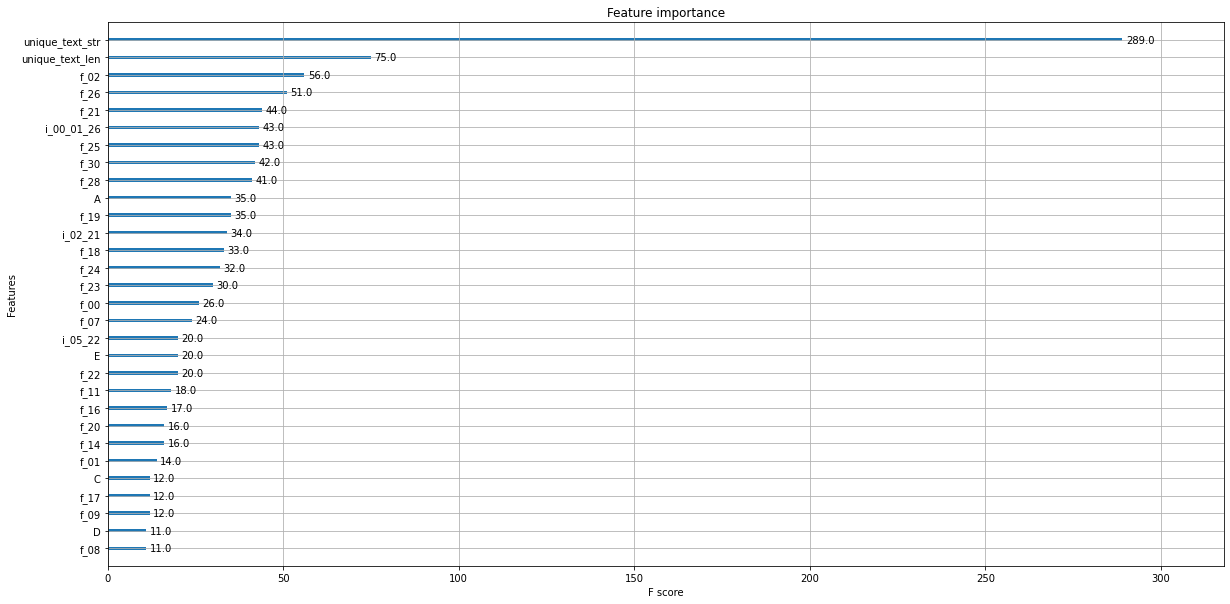

In [8]:
# show feature importance
from xgboost import plot_importance
plot_importance(model_xgb, max_num_features = 30)
plt.show()

# Submit

In [9]:
submission.to_csv('submission.csv',columns=['xgb'], header=['target'],index=True)